In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./module09_files/ad_campaigns_stats.csv')

data.head()

,group,phrase,effect,ad_id,title,text,link,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9cc0c5f6ca


# Упражнение для самопроверки
(1 возможный балл)
Сначала нам необходимо получить топ самых 'популярных' кампаний. Т. е. посчитать сколько раз каждая кампания из столбца campaign упоминается в датафрейме. С помощью какого из перечисленных методов это можно посчитать?

In [3]:
data.campaign.value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

Названия кампаний теперь в индексе полученного датафрейма. Извлечем индекс, используя метод с простым названием index:

In [4]:
data.campaign.value_counts().index

Index(['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a',
       '7388fb4c7b', 'be97523396', '8d3a748298', 'acc3077e55', '718ce6a065',
       ...
       '5b0c050763', '5a7508fa8d', '63153306ff', 'da872d1fb4', 'd5b16c7769',
       'f80e902d76', 'eb577faed1', '7b17b2d188', 'a117c5fc1b', 'b3f52e6f64'],
      dtype='object', length=115)

In [5]:
most_popular_campaigns = data.campaign.value_counts().index[:5].tolist()

In [6]:
most_popular_campaigns

['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a']

In [7]:
least_popular_campaigns = data.campaign.value_counts().index[-5:].tolist()

In [8]:
least_popular_campaigns

['f80e902d76', 'eb577faed1', '7b17b2d188', 'a117c5fc1b', 'b3f52e6f64']

# ФИЛЬТРУЕМ ДАТАФРЕЙМ
Перед тем как заняться визуализацией распределения для простоты отфильтруем исходный датафрейм по топ-5 кампаний (уберем остальные лишние строки):

In [9]:
data = data[data.campaign.isin(most_popular_campaigns)]

# ПОСТРОЕНИЕ РАСПРЕДЕЛЕНИЯ
Остался последний шаг - построить и нарисовать распределение. На самом деле это будет самым простым шагом, т. к. в Pandas для этого есть метод с коротким названием hist. Перед тем как рисовать графики надо один раз выполнить следующую команду. Она позволяет отображать графики прямо в браузере.

In [11]:
%matplotlib inline

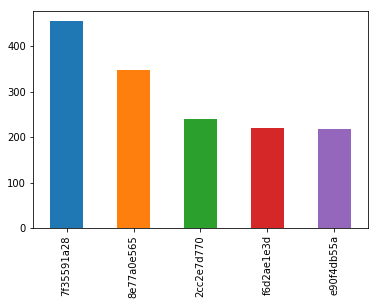

In [14]:
data['campaign'].value_counts().plot(kind='bar')

# ДАННЫЕ ПО ПРОДАЖАМ
В этом блоке мы посмотрим как изменять форматирование элементов графиков в Matplotlib. Будем использовать данные про продажам за последние 3 года sales_data.csv. Посмотрим что есть в файле:

In [15]:
data = pd.read_csv('./module09_files/sales_data.csv', sep=';')

data.head()

,month,2016,2017,2018
0,1,513,465,500
1,2,534,481,523
2,3,608,553,580
3,4,620,561,593
4,5,577,563,600


# ВИЗУАЛИЗАЦИЯ ГОД К ГОДУ
Наша задача отобразить продажи за три последних года на оси месяцев от 1 до 12. Для этого мы будем использовать метод pyplot, с помощью которого последовательно несколькими командами добавим необходимые данные на итоговый график.

Для краткости импортируем библиотеку следующим образом:

In [16]:
import matplotlib.pyplot as plt

Добавляем нужные данные тремя командами (ось X задаем в первой команде, в остальных добавляем данные по оси Y и получаем графики):

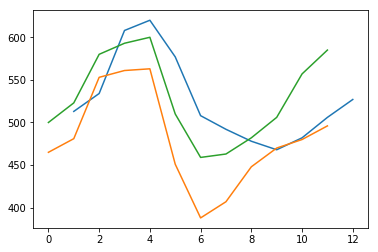

In [17]:
plt.plot(data['month'], data['2016'])

plt.plot(data['2017'])

plt.plot(data['2018'])

# ИЗМЕНЕНИЕ ТИПОВ ЛИНИЙ
Метод plot имеет множество параметров для придания графикам нужного вида. Например, можем добавить маркеры на график 2016 года:

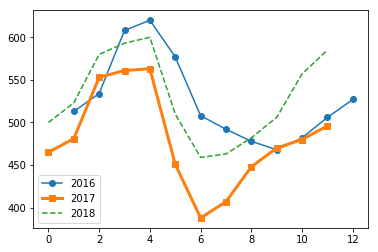

In [27]:
plt.plot(data['month'], data['2016'], marker='o')
plt.plot(data['2017'], marker='s', linewidth=3)
plt.plot(data['2018'], linestyle='dashed')
plt.legend();